# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import timeit

from scipy.interpolate import splrep, splev
from scipy.interpolate import barycentric_interpolate

%load_ext memory_profiler

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a_k=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b_k=y_k-a_k*x_k$

***Przykład***


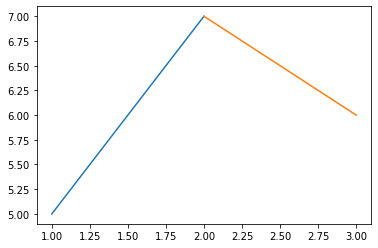

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

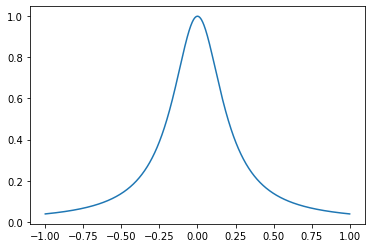

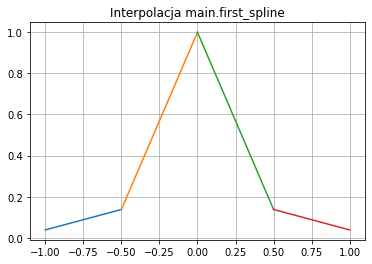

Jakość dla wykonanej interpolacji first spline:  0.1802303832770744 dla  5  węzłów
658 ns ± 101 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 95.42 MiB, increment: -0.36 MiB


Jakość dla wykonanej interpolacji first spline:  0.235848747343683 dla  10  węzłów
664 ns ± 123 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 95.02 MiB, increment: 0.00 MiB


Jakość dla wykonanej interpolacji first spline:  0.05976193079799941 dla  15  węzłów
656 ns ± 122 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.98 MiB, increment: 0.01 MiB


Jakość dla wykonanej interpolacji first spline:  0.06476676998745334 dla  20  węzłów
654 ns ± 113 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 95.33 MiB, increment: 0.02 MiB


Jakość dla wykonanej interpolacji first spline:  0.010305018420896928 dla  50  węzłów
654 ns ± 93.3 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 94.77 MiB, increment: 0.01 MiB


J

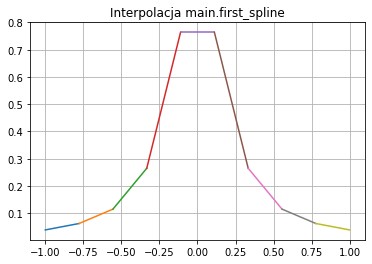

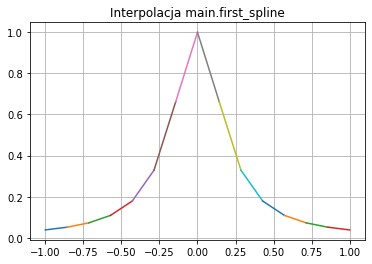

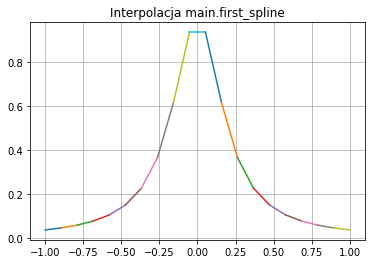

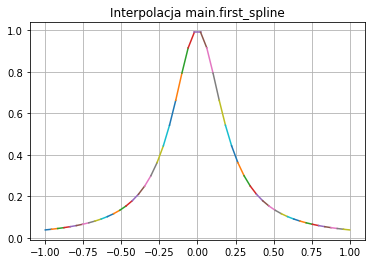

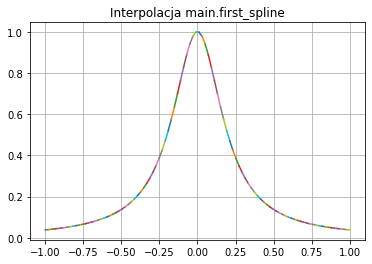

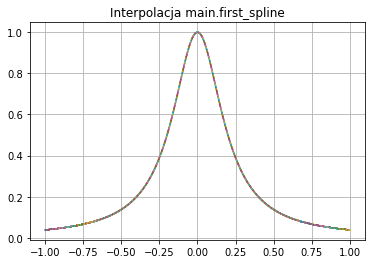

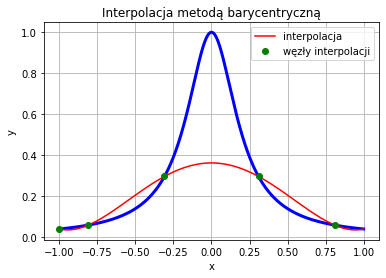

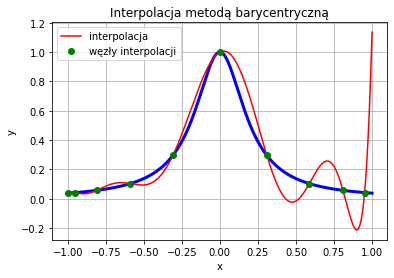

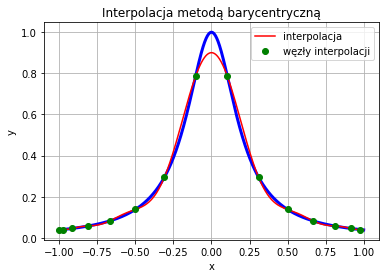

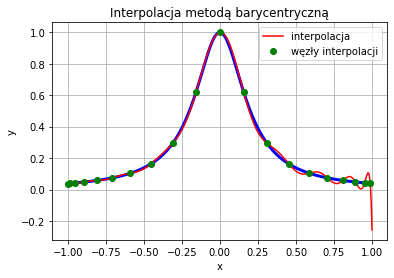

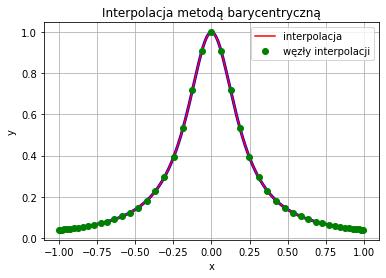

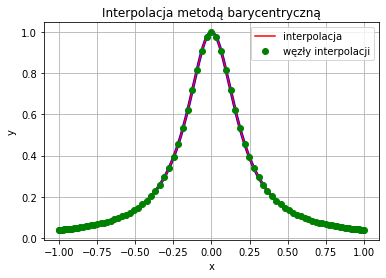

c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:636: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


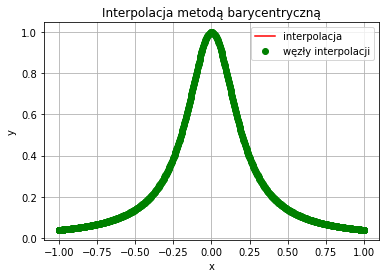

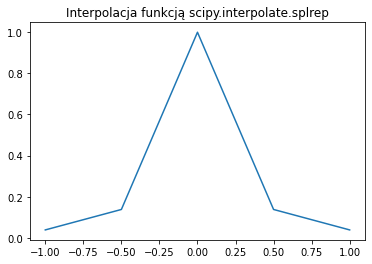

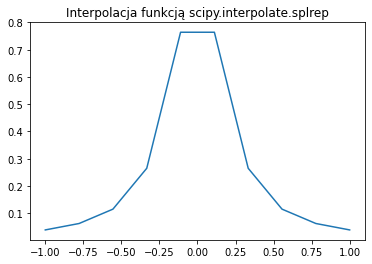

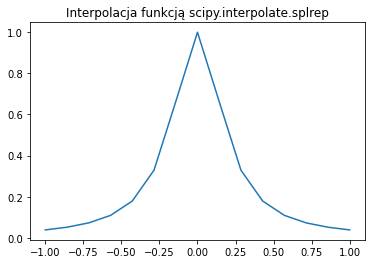

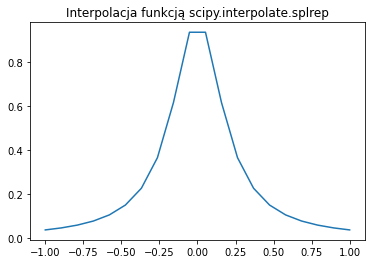

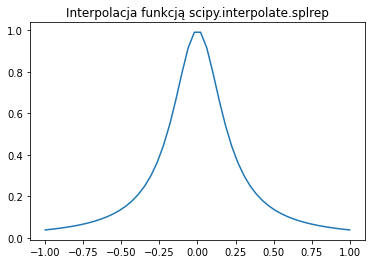

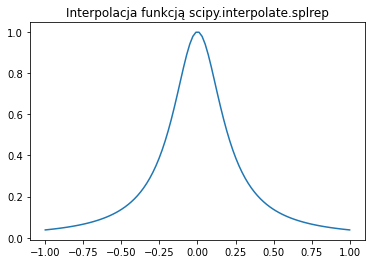

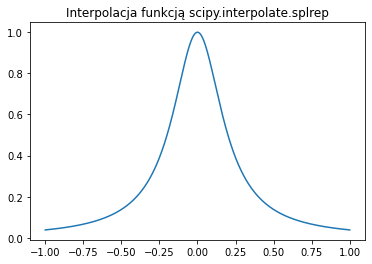

In [3]:
# Funkcja
f = lambda x: 1 / ((25 * (x ** 2)) + 1)
x = np.linspace(-1, 1, 1000)
knots = [5, 10, 15, 20, 50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.first_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
        
    value_list = np.array(value)
    a, b = main.first_spline(x1, value_list)
    z = [[b[i], a[i]] for i in range(len(a))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.first_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji first spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.first_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")
    
for elem in knots:
    # Węzły Czebyszewa 
    xch = np.cos(np.linspace(1, elem, elem) * np.pi / elem)
    x_spline = np.linspace(-1, 1, elem)  
        
    # Wykres interpoalcji metodą barycentryczną
    yimp = barycentric_interpolate(xch, f(xch), x)
    plt.plot(x, f(x), 'b',  linewidth=3 )
    plt.plot(x, yimp, 'r',label = 'interpolacja')
    plt.plot(xch, f(xch), 'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.title("Interpolacja metodą barycentryczną")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji metodą barycentryczną: ", main.L_inf(f(x), yimp), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o yimp
    %memit yimp
    print("\n")
    
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

Jak na poprzednich laboratoriach - metoda barycentryczna jest niewystarczająca

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

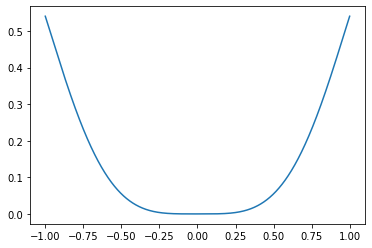

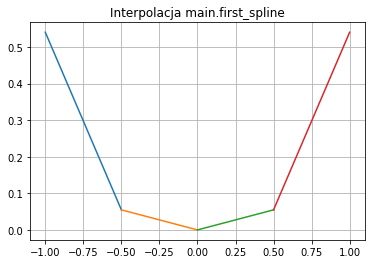

Jakość dla wykonanej interpolacji first spline:  0.06654115513076858 dla  5  węzłów
652 ns ± 84.7 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.94 MiB, increment: 0.00 MiB


Jakość dla wykonanej interpolacji first spline:  0.015594923628826834 dla  10  węzłów
644 ns ± 108 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.49 MiB, increment: 0.02 MiB


Jakość dla wykonanej interpolacji first spline:  0.006484540435255426 dla  15  węzłów
648 ns ± 111 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.60 MiB, increment: 0.00 MiB


Jakość dla wykonanej interpolacji first spline:  0.003513072444681381 dla  20  węzłów
674 ns ± 133 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.98 MiB, increment: 0.00 MiB


Jakość dla wykonanej interpolacji first spline:  0.0005341498421168323 dla  50  węzłów
656 ns ± 102 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 106.01 MiB, increment: 0

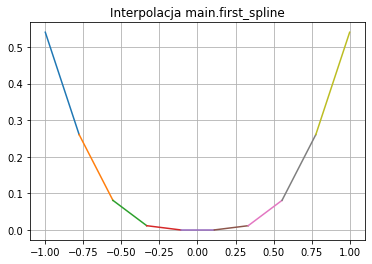

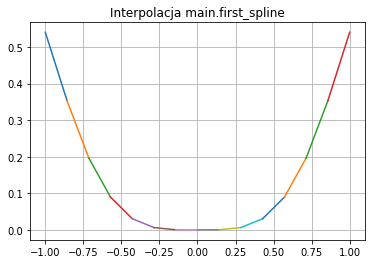

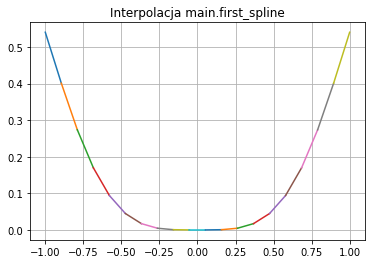

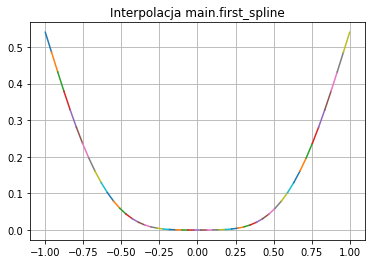

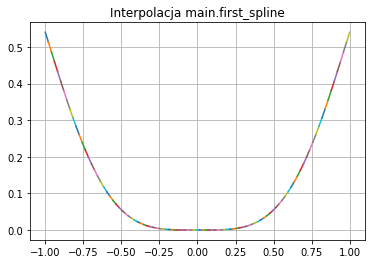

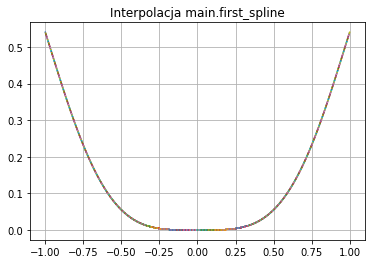

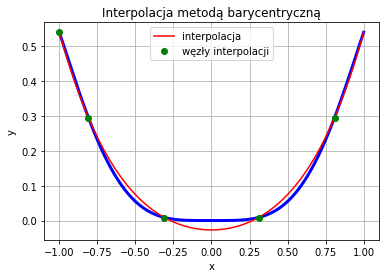

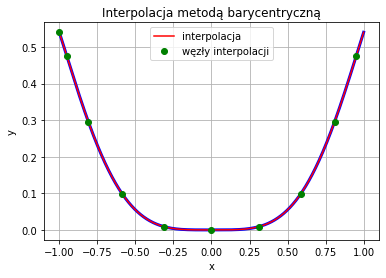

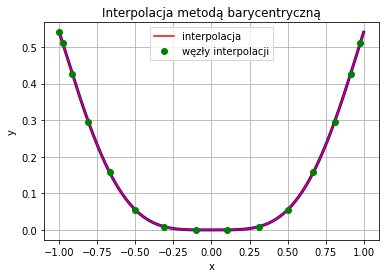

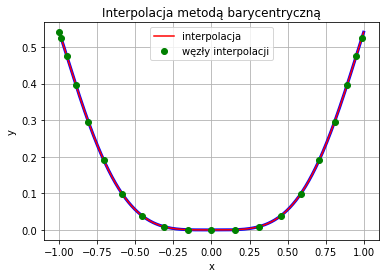

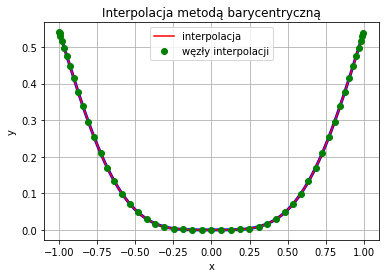

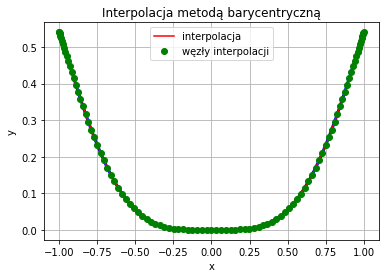

c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:541: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:636: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
c:\users\maciek\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


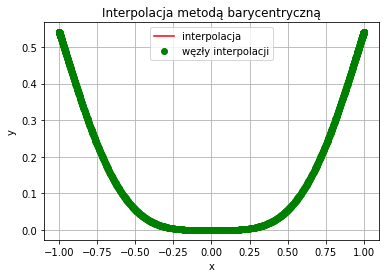

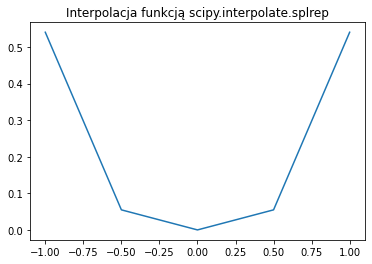

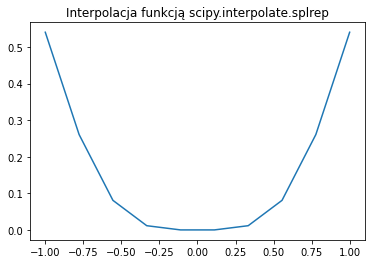

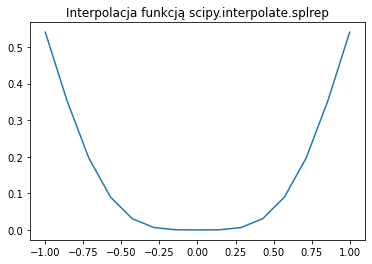

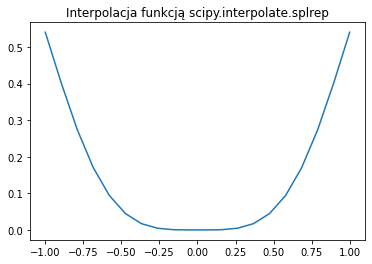

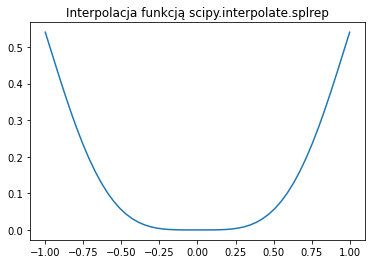

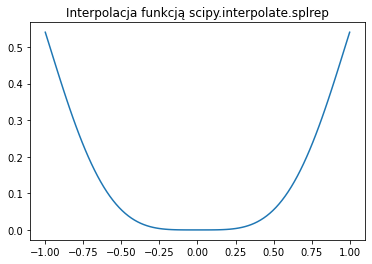

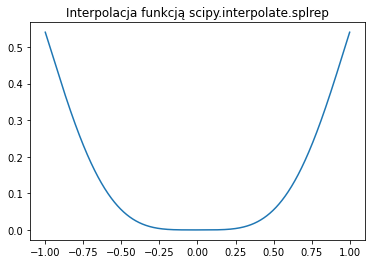

In [4]:
# Funkcja
f = lambda x: np.cos(x) * (x ** 4)
x = np.linspace(-1, 1, 1000)
knots = [5, 10, 15, 20, 50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.first_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
         
    value_list = np.array(value)
    a, b = main.first_spline(x1, value_list)
    z = [[b[i], a[i]] for i in range(len(a))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.first_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji first spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.first_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")
    
for elem in knots:
    # Węzły Czebyszewa 
    xch = np.cos(np.linspace(1, elem, elem) * np.pi / elem)
    x_spline = np.linspace(-1, 1, elem)  
        
    # Wykres interpoalcji metodą barycentryczną
    yimp = barycentric_interpolate(xch, f(xch), x)
    plt.plot(x, f(x), 'b',  linewidth=3 )
    plt.plot(x, yimp, 'r',label = 'interpolacja')
    plt.plot(xch, f(xch), 'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.title("Interpolacja metodą barycentryczną")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji metodą barycentryczną: ", main.L_inf(f(x), yimp), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o yimp
    %memit yimp
    print("\n")
    
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

Jak w poprzednim zadaniu oraz na poprzednich laboratoriach - metoda barycentryczna jest niewystarczająca

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

wprowadzimy następujące zmienne:

$b_0 = y_k$

$b_1 = d_k - \frac{h_k}{6}(2m_k+m_{k+1})$

$b_2 = \frac{m_k}{2}$

$b_3 = \frac{m_{k+1}-m_k}{6h_k}$

gdzie:

$h_k = x_{k+1} - x_k$

$d_k = y_{k+1} - y_k$

$m_k = 3\frac{d_k-d_{k-1}}{h_{k-1}+h_k} - \frac{m_{k-1}*\rho_k}{2}-\frac{m_{k+1}*\lambda_k}{2}$

$\lambda_k = \frac{h_k}{h_{k-1}+h_k}$

$\rho_k = \frac{h_{k-1}}{h_{k-1}+h_k}$

dzieki temi współczynniki możemy wyznaczyć w następującyu sposób:

$a_3 = b_3$

$a_2 = b_2 - 3*b_3*x_k$

$a_1 = b1 - 2*b_2*x_k + 3*b_3*x_k*x_k$

$a_0 = b_0 - b_1*x_k + b_2*x_k*x_k - b_3*x_k*x_k*x_k$

Do wyznaczenia $m_0$ oraz $m_n$ wykorzystujemy metodę ograniczeń naturalnych i przyjmujemy te wartości jako zerowe.
Jako wektor $m_k$ przyjmij początkowo zera np.zeros.

***Przykład***

In [8]:
x=np.array([1,2,3])
y=np.array([5,7,6])


a0,a1,a2,a3 = main.cubic_spline(x,y)
f = [[a0[i],a1[i],a2[i],a3[i]] for i in range(len(a))]


for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

IndexError: index 2 is out of bounds for axis 0 with size 2

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

In [ ]:
# Funkcja
f = lambda x: 1 / ((25 * (x ** 2)) + 1)
x = np.linspace(-1, 1, 1000)
knots = [50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.cubic_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
         
    value_list = np.array(value)
    a0, a1, a2, a3 = main.cubic_spline(x1, value_list)
    z = [[a0[i], a1[i], a2[i], a3[i]] for i in range(len(a0))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.cubic_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji cubic_spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.cubic_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")
      
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

In [ ]:
# Funkcja
f = lambda x: np.cos(x) * (x ** 4)
x = np.linspace(-1, 1, 1000)
knots = [50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.cubic_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
        
    value_list = np.array(value)
    a0, a1, a2, a3 = main.cubic_spline(x1, value_list)
    z = [[a0[i], a1[i], a2[i], a3[i]] for i in range(len(a0))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.cubic_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji cubic_spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.cubic_spline(x, value)
    %memit main.first_spline(x, value)
    print("\n")
      
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 dla różnych ilości wartości węzłów: 50, 100, 1000 oraz przedstawić wyniki na odpowiednich wykresach.

In [ ]:
# Funkcja
f = lambda x: abs((np.sin(5 * x) ** 3))
x = np.linspace(-1, 1, 1000)
knots = [50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.cubic_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
        
    value_list = np.array(value)
    a0, a1, a2, a3 = main.cubic_spline(x1, value_list)
    z = [[a0[i], a1[i], a2[i], a3[i]] for i in range(len(a0))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.cubic_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji cubic_spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.cubic_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")

# Dla napisanej funkcji main.first_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
         
    value_list = np.array(value)
    a, b = main.first_spline(x1, value_list)
    z = [[b[i], a[i]] for i in range(len(a))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.first_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji first spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.first_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")



Kod z pliku main.py przeszedł przez testerkę lokalną bez żadnych błędów.